In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a7946c70a0a4583f29394a26fcdcd173


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

1.5861584945324978 -126.92027521333766
30.92626439527504 82.15142731207021
67.94089216228483 102.32764897775411
-8.729602686777255 136.7898671754662
-37.46295253522366 66.28174480459214
-74.27083901825988 -123.93935373251668
57.24672562711652 93.04290633072048
-23.610660930348672 -153.18191175493976
-50.84235589149142 -69.08044168316508
19.355569611753523 -32.766385052153794
52.91858097728263 108.81853036302334
2.503247247799223 168.11788423154093
-25.778913962740788 -134.78108297143805
46.52342663684695 -148.9674246648941
87.51194699231516 8.39176914181624
-80.62249907231472 -94.17745680529205
68.92586320233536 23.019369715445748
46.05269645222248 6.270287423197516
13.526947728858616 38.10069749170427
-67.40604234798539 -106.17123029122428
82.5834340615049 -14.99302550354571
-78.06575990031934 75.29934128931609
-60.38086795124214 -4.06725371025226
-35.062001719654084 98.95055417374277
43.03762958009165 18.447529375672758
-75.96070673184038 -67.51296346041505
3.178069823657779 135.2721

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | jumla
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | nhulunbuy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | bolshaya murta
City not found. Skipping...
Processing Record 8 of Set 1 | avera
Processing Record 9 of Set 1 | rio gallegos
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | ust-barguzin
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | kautokeino
Processing Record 17 of Set 1 | annemasse
Processing Record 18 of Set 1 | dabat
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 2

Processing Record 42 of Set 4 | sackville
Processing Record 43 of Set 4 | nyurba
Processing Record 44 of Set 4 | qurayyat
Processing Record 45 of Set 4 | tuatapere
Processing Record 46 of Set 4 | andenes
Processing Record 47 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 48 of Set 4 | tuktoyaktuk
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | byron bay
Processing Record 1 of Set 5 | yertarskiy
Processing Record 2 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 3 of Set 5 | bhainsa
Processing Record 4 of Set 5 | tokur
Processing Record 5 of Set 5 | kirakira
Processing Record 6 of Set 5 | kamina
Processing Record 7 of Set 5 | kaitangata
Processing Record 8 of Set 5 | oranjemund
Processing Record 9 of Set 5 | port-gentil
Processing Record 10 of Set 5 | dabhol
Processing Record 11 of Set 5 | armizonskoye
Processing Record 12 of Set 5 | sao felix do xingu
Processing Record 13 of Set 5 | voyvozh
Processing Record 14 of S

Processing Record 30 of Set 8 | ca mau
Processing Record 31 of Set 8 | mount gambier
Processing Record 32 of Set 8 | katsuura
Processing Record 33 of Set 8 | wana
Processing Record 34 of Set 8 | haapiti
Processing Record 35 of Set 8 | prescott
Processing Record 36 of Set 8 | wodonga
Processing Record 37 of Set 8 | kaputa
Processing Record 38 of Set 8 | talcahuano
Processing Record 39 of Set 8 | dhidhdhoo
Processing Record 40 of Set 8 | upington
Processing Record 41 of Set 8 | korla
Processing Record 42 of Set 8 | samusu
City not found. Skipping...
Processing Record 43 of Set 8 | lasa
Processing Record 44 of Set 8 | montalban
Processing Record 45 of Set 8 | mogadishu
Processing Record 46 of Set 8 | hasaki
Processing Record 47 of Set 8 | vila franca do campo
Processing Record 48 of Set 8 | deputatskiy
Processing Record 49 of Set 8 | arman
Processing Record 50 of Set 8 | lubumbashi
Processing Record 1 of Set 9 | port lincoln
Processing Record 2 of Set 9 | saint anthony
Processing Record 3

Processing Record 16 of Set 12 | safwah
City not found. Skipping...
Processing Record 17 of Set 12 | taraz
Processing Record 18 of Set 12 | rocha
Processing Record 19 of Set 12 | klaksvik
Processing Record 20 of Set 12 | vestmanna
Processing Record 21 of Set 12 | boende
Processing Record 22 of Set 12 | ternate
Processing Record 23 of Set 12 | mananjary
Processing Record 24 of Set 12 | maniitsoq
Processing Record 25 of Set 12 | damavand
Processing Record 26 of Set 12 | athabasca
Processing Record 27 of Set 12 | merauke
Processing Record 28 of Set 12 | beringovskiy
Processing Record 29 of Set 12 | sengiley
Processing Record 30 of Set 12 | capitan bado
Processing Record 31 of Set 12 | nemuro
Processing Record 32 of Set 12 | kalulushi
Processing Record 33 of Set 12 | hyeres
Processing Record 34 of Set 12 | rock sound
Processing Record 35 of Set 12 | daxian
City not found. Skipping...
Processing Record 36 of Set 12 | terrace
Processing Record 37 of Set 12 | kulevcha
Processing Record 38 of 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.46,80,9,21.34,PF,2022-12-21 06:12:31
1,Jumla,29.2747,82.1838,57.76,11,1,5.28,NP,2022-12-21 06:12:32
2,Khatanga,71.9667,102.5000,-24.39,80,1,17.78,RU,2022-12-21 06:12:32
3,Nhulunbuy,-12.2333,136.7667,77.61,94,75,13.80,AU,2022-12-21 06:12:33
4,Souillac,-20.5167,57.5167,81.28,57,23,11.03,MU,2022-12-21 06:12:33
5,Rikitea,-23.1203,-134.9692,76.37,86,45,17.81,PF,2022-12-21 06:12:34
6,Avera,33.1940,-82.5271,38.37,75,100,10.65,US,2022-12-21 06:12:35
7,Rio Gallegos,-51.6226,-69.2181,52.43,77,49,13.33,AR,2022-12-21 06:12:35
8,Ponta Do Sol,32.6667,-17.1000,66.70,83,91,1.01,PT,2022-12-21 06:09:01
9,Ust-Barguzin,53.4500,108.9833,0.77,87,85,5.19,RU,2022-12-21 06:12:36


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-12-21 06:12:31,-9.8000,-139.0333,78.46,80,9,21.34
1,Jumla,NP,2022-12-21 06:12:32,29.2747,82.1838,57.76,11,1,5.28
2,Khatanga,RU,2022-12-21 06:12:32,71.9667,102.5000,-24.39,80,1,17.78
3,Nhulunbuy,AU,2022-12-21 06:12:33,-12.2333,136.7667,77.61,94,75,13.80
4,Souillac,MU,2022-12-21 06:12:33,-20.5167,57.5167,81.28,57,23,11.03
5,Rikitea,PF,2022-12-21 06:12:34,-23.1203,-134.9692,76.37,86,45,17.81
6,Avera,US,2022-12-21 06:12:35,33.1940,-82.5271,38.37,75,100,10.65
7,Rio Gallegos,AR,2022-12-21 06:12:35,-51.6226,-69.2181,52.43,77,49,13.33
8,Ponta Do Sol,PT,2022-12-21 06:09:01,32.6667,-17.1000,66.70,83,91,1.01
9,Ust-Barguzin,RU,2022-12-21 06:12:36,53.4500,108.9833,0.77,87,85,5.19


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

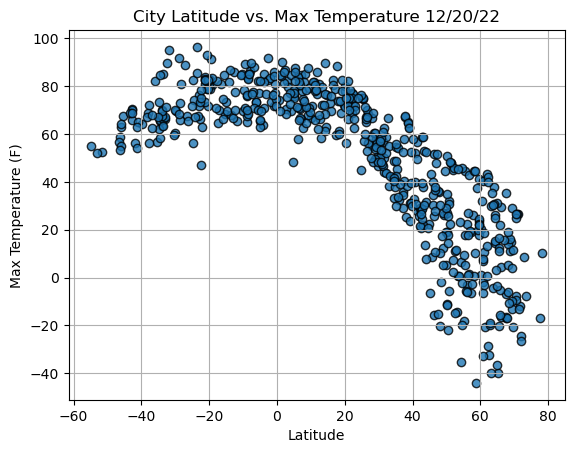

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

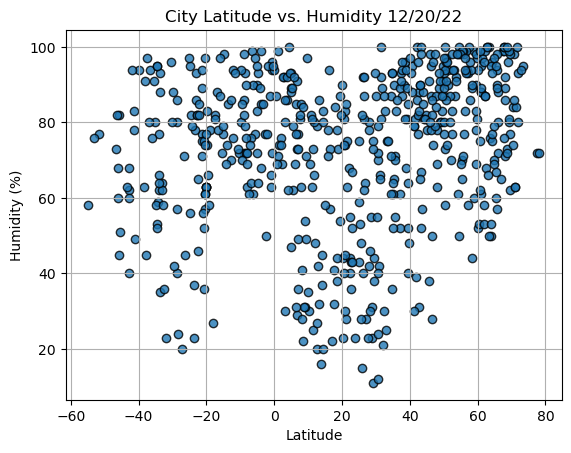

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

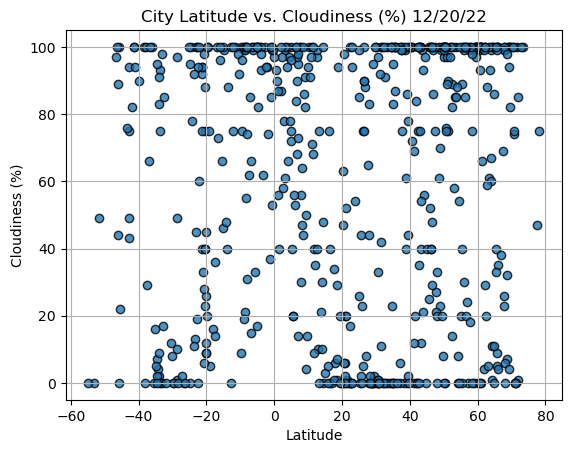

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

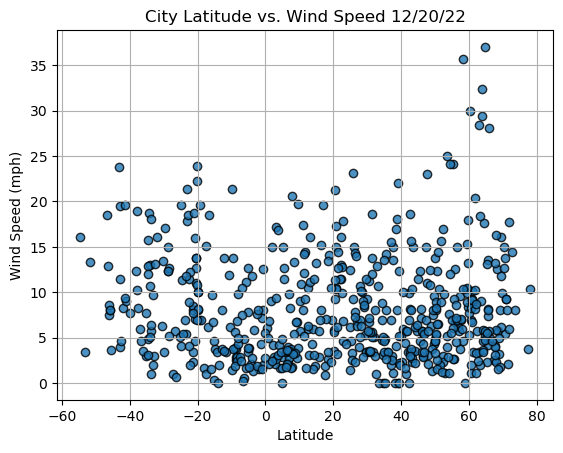

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

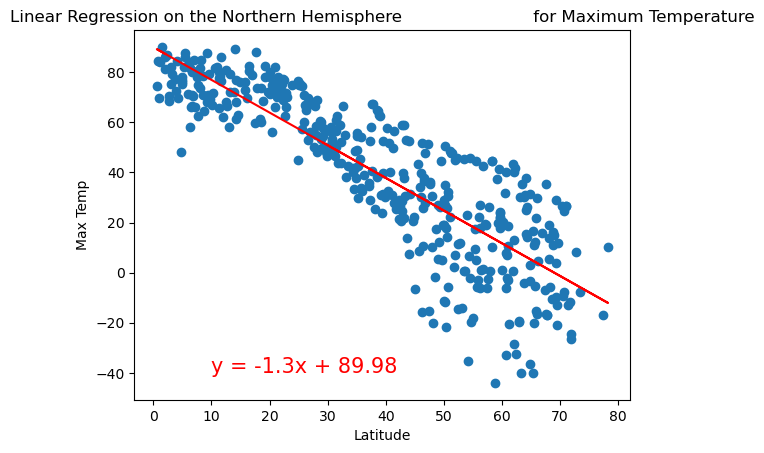

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

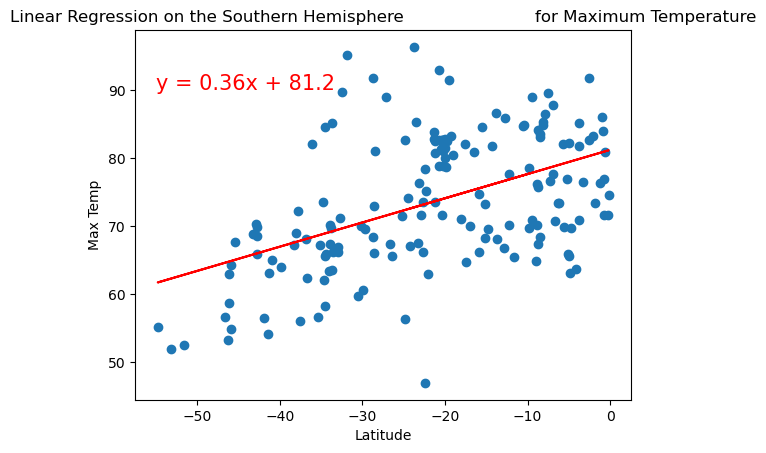

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))

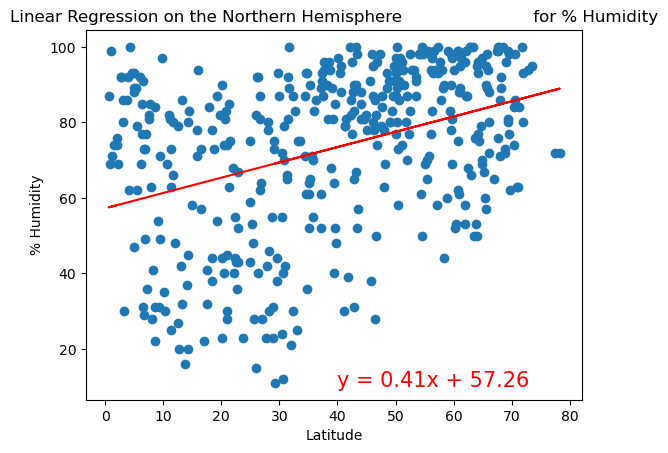

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

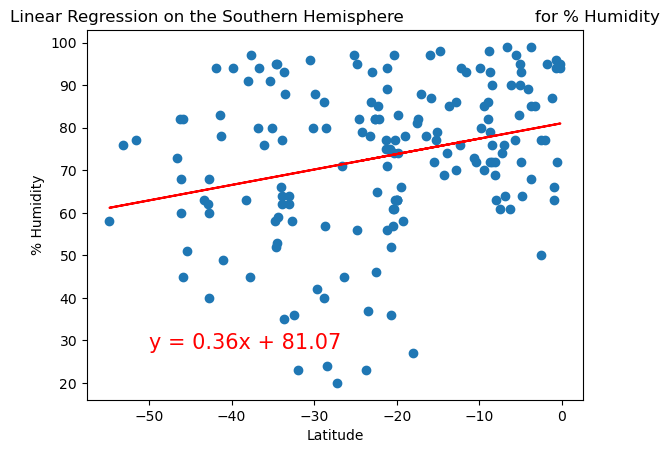

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,28))

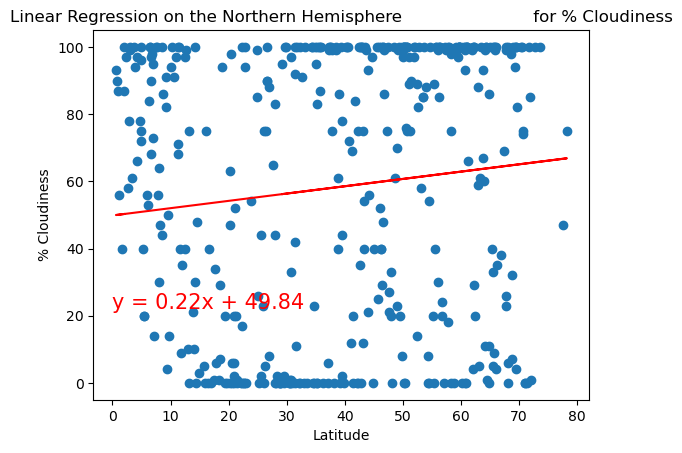

In [35]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,22))

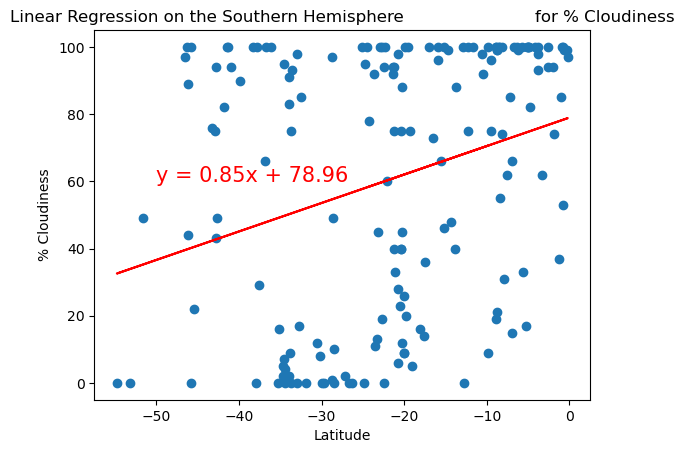

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

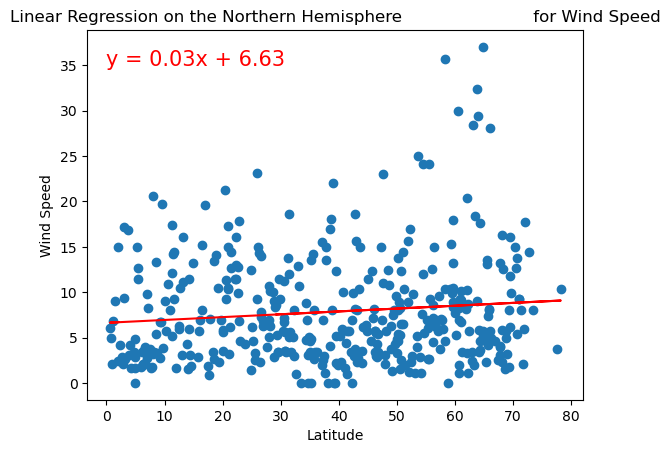

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,35))

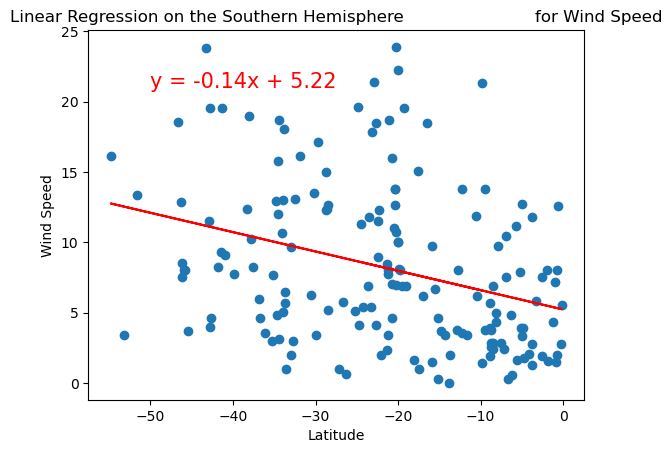

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,21))